## Reconstructing a sentence
A sentence is made up of words which is again made up of letters from the
alphabet. We can all agree that any sentence can be completely described by
a set of letters. However, if we are missing some letters from a sentence,
can we still read it's contents? Can we be sure that we correctly reconstruct the
original sentence from the incomplete sentence?

To experiment, we load an unknown sentence from the text file `sentence.txt`,
Do not look at the original contents, as we want to see how many letters we
can remove while still being able to read it.

In [38]:
sentence = ' '.join(open('sentence.txt', 'r').read().splitlines())

To be able to delete letters in a systematic way, we convert the sentence to a
list. Then we use `del` to delete contents. We use the slicing notation `[::2]`
which in this context means that we remove every other letter, with `[::3]` we
remove every third and so on.

In [39]:
# Record only parts of the sentence
sampled_sentence = list(sentence)
del(sampled_sentence[::2])
# Put the sentence back together as a readable string
''.join(sampled_sentence)

'h udmna rbe fcmuiaini hto erdcn toepitete xcl rapoiaeyamsaeslce taohrpit rqetytemsae aemaig hti hyrfrt raecreae codn osm ytmwt eti hsclo ocpulette.'

<!-- --- begin exercise --- -->

## Exercise 1: Discussion

Go together in groups of 4-5 and try to determine what the sentence say.
If you are unable to make sense of it, increase the 'slicing number' by one and
try again.


**a)**
Do you come up with different answers?
When does the sentence go from unreadable to readable?
Discuss among yourselves what the consquences may be if you try to reconstruct
the sentence when there are too many letters missing.



<!-- Closing remarks for this Exercise -->

### Remarks

When you are not sure what the sentence say, or you have two equally likely
answers, we can say that the sentence is impossible to reconstruct from the
sampled sentence.


<!-- --- end exercise --- -->


## Reconstructing a signal
We beging by importing some packages that can help us analyse and visualize
data.

In [40]:
from pylab import *
from scipy import signal
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline
rcParams['figure.figsize'] = (14, 5)

Continuous signals are measured or recorded from the physical world. For example
we may record a drum player, playing his drums. This is sometimes reffered to
as an analog signal.

In [41]:
filename = 'simpleLoop.wav'

ipd.Audio(filename) # load a local WAV file

The sound we hear is made up of preassure
waves that travels through air. Imagine we were able to take a picture of the
preassure/sound wave. We could then zoom in on it as much as we like and we would
never see any parts/pixels/something. This is what we call continuous.

On the other hand, when we record the audio with a computer, the pressure moves
a small membrane that produces an electrical signal. We then pick samples from
the signal, and represent each sample with a digital code.
The chopped up signal is called discontinuous because
it is made up of small pieces/samples.
The discontinuous signal is also reffered to as a digital signal.

Lets look at how the digital signal from the drum recording looks like.

Text(0,0.5,'Amplitude')

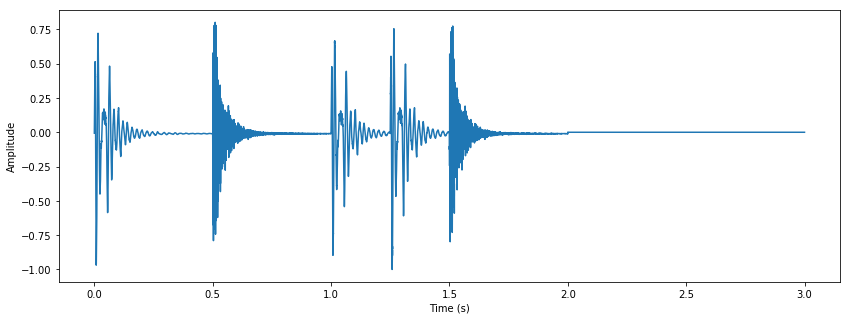

In [42]:
sound, sample_rate = librosa.load(filename)
n_samples = len(sound)
duration = len(sound) / sample_rate
time = linspace(0, duration, n_samples)
plot(time, sound)
xlabel('Time (s)')
ylabel('Amplitude')

[Mikkel 1: animate plot to see that time goes by]
We can se each time the drummer hit the drums as large distortions, if
we look closely we can distinguish two type of distortions. Each of the two
different drums played on produces a distinctive signature. If we zoom in on
the discontinuous signal it seems continuous; this is because `plot`
draws a line between each sample of the signal.

Text(0,0.5,'Amplitude')

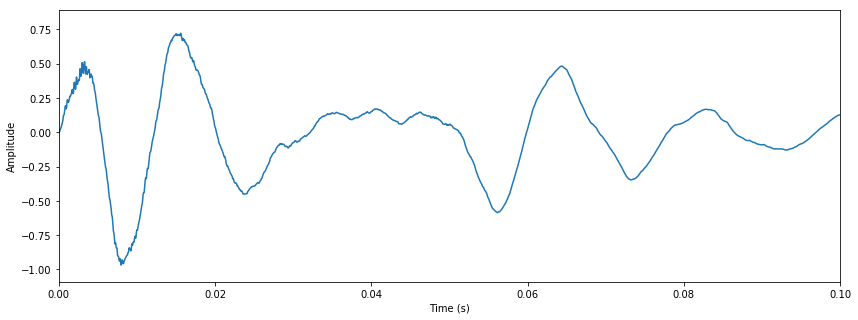

In [43]:
plot(time, sound)
xlim([0, 0.1])
xlabel('Time (s)')
ylabel('Amplitude')

We can turn this behvior off and only show each measured value (sample) of the signal.

Text(0,0.5,'Amplitude')

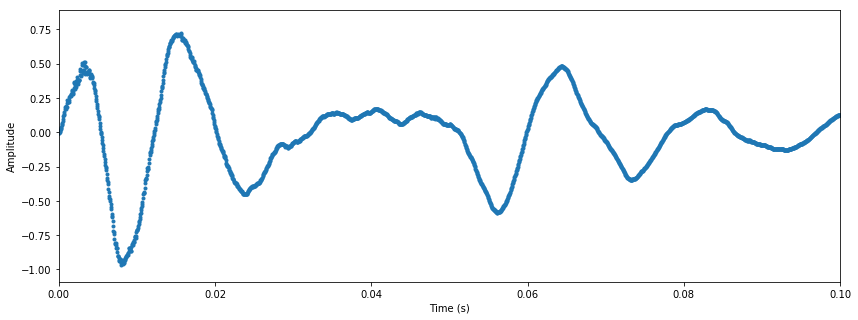

In [44]:
plot(time, sound, '.')
xlim([0, 0.1])
xlabel('Time (s)')
ylabel('Amplitude')

If we zoom in, we can see that it is made up of samples.

Text(0,0.5,'Amplitude')

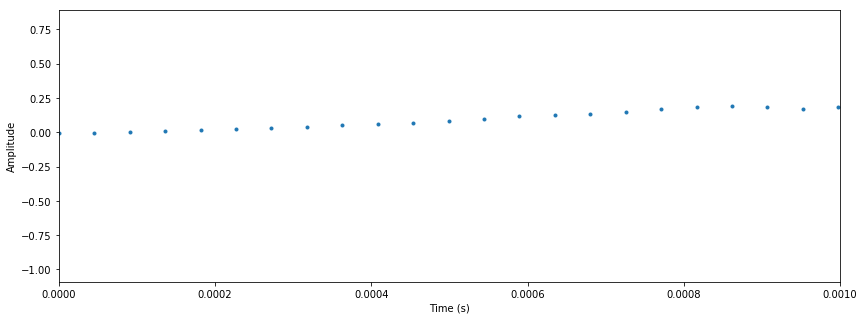

In [45]:
plot(time, sound, '.')
xlim([0, 0.001])
xlabel('Time (s)')
ylabel('Amplitude')

This is similar to the example above where we wanted to reconstruct a sentence
which had missing letters. In the sound signal we have lots samples ("letters") and
we can thus easily hear that this is a drum. Moreover, people familiar with drums can
probably tell what kind of drums it is. Many samples is reffered to as having
a high sampling rate, that is you sample many times per second.

Lets play the game again where we remove some of the samples ("letters").

[Mikkel 2: why does this not work?]

In [46]:
sound_sampled = sound[::1000]
ipd.Audio(sound_sampled, rate=len(sound_sampled) / duration)

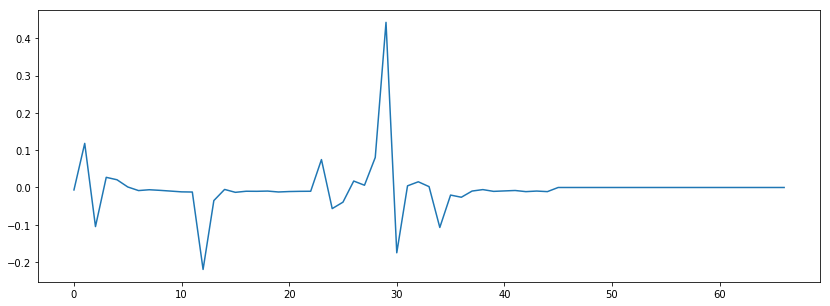

In [47]:
plot(sound_sampled)

<!-- --- begin exercise --- -->

## Exercise 2: Discussion

How do we know that we have enough samples?

We can say that a reconstruction of the continuous signal by means of the
discontinuous signal is dependent on similar notions as with the problem of
reconstructing a sentence with missing letters.

Go together in groups of 4-5 and try to determine how we can determine if a
reconstructed signal is good enough.

<!-- --- end exercise --- -->


## Representing a signal as frequencies
All continuous signals can be represented as a sum of sinusoids at different
frequencies.

Before we continue, it is recommended that you first watch this video by 3Blue1Brown
<!-- dom:MOVIE: [https://www.youtube.com/watch?v=spUNpyF58BY] -->
<!-- begin movie -->

In [48]:
from IPython.display import HTML
_s = """
<iframe width="640" height="365" src="https://www.youtube.com/embed/spUNpyF58BY" frameborder="0" allowfullscreen></iframe>
"""
HTML(_s)

<!-- end movie -->


As described in the video above, we extract the frequencies from the `sound`
signal by using the Fourier transform. Which means we break the signal apart
into sinusoids of different frequencies and calculate the amplitude of each
sinusoid. This amplitude represent how much of its corresponding frequency there
is in the signal.

However, how does this translate when the signal is discretized
i.e. when information is lost?
How fast do we have to sample in order to retain the sinusoids we are
interested in?

Lets beging again with the sound of drums. We can look at what frequencies it
has at different times by taking the Fourier transform.

## Spectrogram

In [49]:
sound_frequency = abs(librosa.stft(sound))

Since sound is usually made up of some amplitudes that are very large and
some very small, it can sometimes be hard to see the small ones in presence of
the large ones. We therefore take the logarithm of the amplitudes, which gives
us Decibel (db).

In [50]:
sound_frequency_db = librosa.amplitude_to_db(sound_frequency)

We can now visualize the different frequencies at different time points,
with what is called a `spectrogram`.
In this plot the colors represent the Decibel, with high values in red and lower
values in blue.

Text(0,0.5,'Frequency (Hz)')

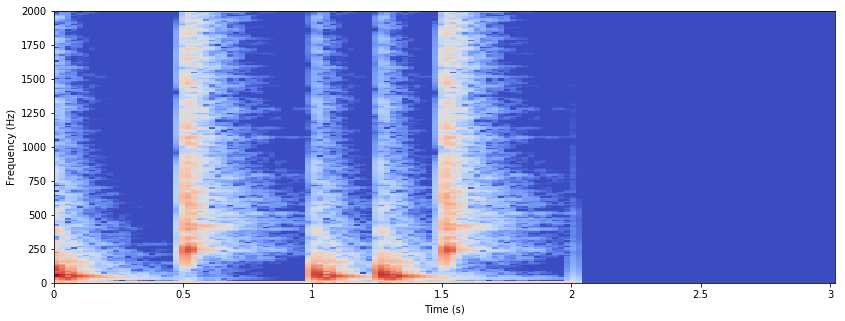

In [51]:
librosa.display.specshow(sound_frequency_db, sr=sample_rate, x_axis='time', y_axis='hz')
ylim([0, 2000])
xlabel('Time (s)')
ylabel('Frequency (Hz)')

!bnote
If you wonder how this looks like without converting to Decibel, try to change
the above to `librosa.display.specshow(sound_frequency, sr=sample_rate, x_axis='time', y_axis='hz')`
!enote



<!-- --- begin exercise --- -->

## Exercise 3: Discussion

In the plot above there is two different blobs with it's peak at different
frequencies. Go together in groups of 4-5 and discuss how this relates to the
sound from the drums.

<!-- --- end exercise --- -->


## Periodogram

Yet another example of representing the frequencies of the signal is to make
a `periodogram`, which can be thought of as collapsing the time information.
Think of it as taking the mean along the x axis in the above
plot. If we put a `periodogram` and a `spectrogram` next to each other,
this is easier to see.

(1e-12, 0.005)

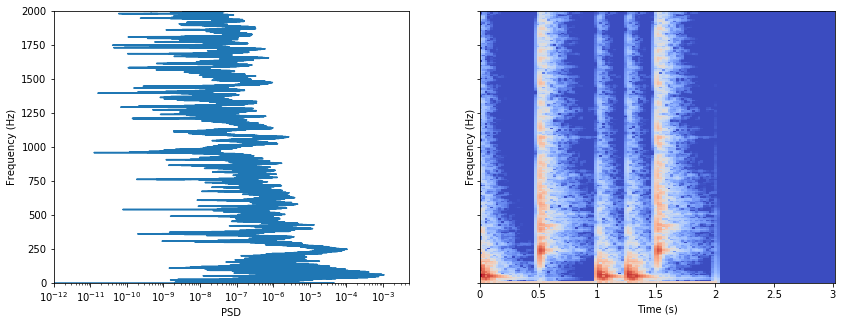

In [52]:
fig, (psd_ax, spec_ax) = subplots(1, 2, sharey=True)
librosa.display.specshow(
  sound_frequency_db, sr=sample_rate, x_axis='time', y_axis='hz', ax=spec_ax)
spec_ax.set_ylim([0, 2000])
spec_ax.set_xlabel('Time (s)')
spec_ax.set_ylabel('Frequency (Hz)')

frequency, psd = signal.periodogram(sound, sample_rate)
psd_ax.semilogx(psd, frequency)
psd_ax.set_ylabel('Frequency (Hz)')
psd_ax.set_xlabel('PSD')
psd_ax.set_xlim([1e-12, 5e-3])

<!-- --- begin exercise --- -->

## Exercise 4: Discussion

What would you use these different plots for if you wanted to explain the sound
by it's frequencies?

<!-- --- end exercise --- -->


## Example: Making a signal
We can make a signal of our own by using the `sin` function. First we have to
determine how many samples pr. second the signal is to have (how many dots).

In [53]:
sample_rate = 10000 # sample pr. second

We set the duration in seconds

In [54]:
duration = 2.0    # seconds

The amplitude represents how loud the signal will be

In [55]:
amplitude = 0.5

The frequency determine the pitch

In [56]:
frequency = 440

Then we have to make a time variable, which says for each signal point, what
time it is (relative to the start at 0).
To do this we have to realize that if you multiply the duration
in seconds with the number of samples pr. second i.e. $seconds \cdot samples / seconds$
we get the number of samples.

In [57]:
n_samples = int(duration * sample_rate)
time = linspace(0, duration, n_samples) # time variable

Finally, we can make the signal

In [58]:
sound_440 = amplitude * sin(2 * pi * frequency * time)  # pure sine wave at 440 Hz

If we plot it we can see that it is a completely normal sinusoid

Text(0,0.5,'Amplitude')

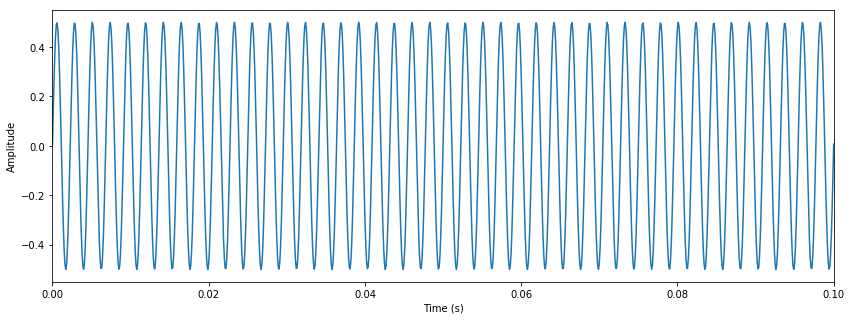

In [59]:
plot(time, sound_440)
xlim([0, .1])
xlabel('Time (s)')
ylabel('Amplitude')

If we zoom in and set on markers we can see the samples with the line drawn
between

Text(0,0.5,'Amplitude')

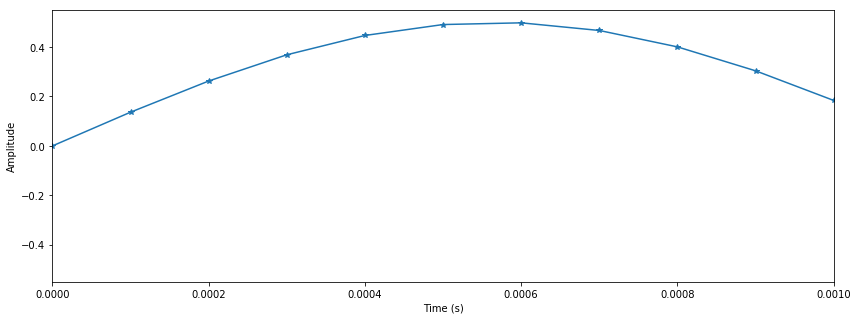

In [60]:
plot(time, sound_440, '-*')
xlim([0, .001])
xlabel('Time (s)')
ylabel('Amplitude')

What does this sinusoid sound like?

In [61]:
ipd.Audio(sound_440, rate=sample_rate)

<!-- --- begin exercise --- -->

## Exercise 5: The Sound of Sinusoids

Lets make another sinusoid at a lower frequency

Text(0,0.5,'Amplitude')

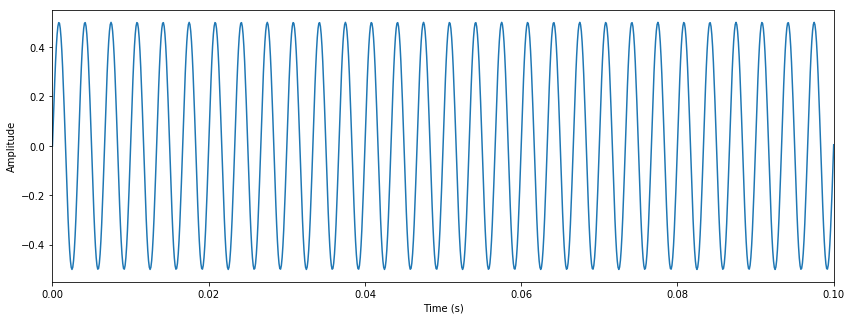

In [62]:
frequency = 300
sound_300 = amplitude * sin(2 * pi * frequency * time)        # pure sine wave at 300 Hz
plot(time, sound_300)
xlim([0, .1])
xlabel('Time (s)')
ylabel('Amplitude')

Can you guess if how this sound at 300 Hz will sound like relative to the one
at 440 Hz? Higer or lower pitch?


<!-- --- begin solution of exercise --- -->
**Solution.**

In [63]:
ipd.Audio(sound_300, rate=sample_rate)

<!-- --- end solution of exercise --- -->

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 6: The Sum of Sinusoids

We make a new sound which is the sum of the one at 440 Hz and the one at
300 Hz.


**a)**
How does the sum of these signals look like?


<!-- --- begin solution of exercise --- -->
**Solution.**

Text(0,0.5,'Amplitude')

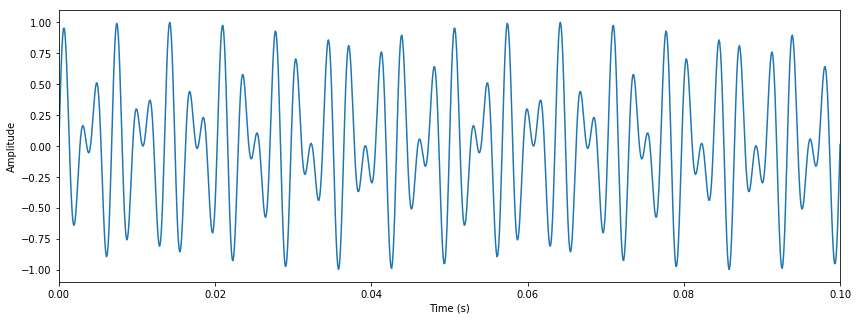

In [64]:
sound_sum = sound_300 + sound_440
plot(time, sound_sum)
xlim([0, .1])
xlabel('Time (s)')
ylabel('Amplitude')

<!-- --- end solution of exercise --- -->

**b)**
How does the sum sound like?


<!-- --- begin solution of exercise --- -->
**Solution.**

In [65]:
ipd.Audio(sound_sum, rate=sample_rate)

<!-- --- end solution of exercise --- -->

**c)**
How will the spectrogram look like?


<!-- --- begin solution of exercise --- -->
**Solution.**

Text(0,0.5,'Frequency (Hz)')

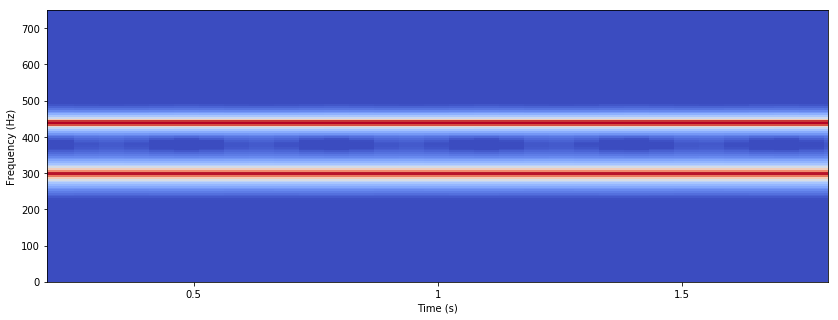

In [66]:
sound_frequency = librosa.stft(sound_sum)
sound_frequency_db = librosa.amplitude_to_db(abs(sound_frequency))

librosa.display.specshow(sound_frequency_db, sr=sample_rate, x_axis='time', y_axis='hz')
ylim([0, 750])
xlim([.2, 1.8])
xlabel('Time (s)')
ylabel('Frequency (Hz)')

<!-- --- end solution of exercise --- -->

<!-- --- end exercise --- -->


## Errors from Sub Sampling
Lets again make the 440 Hz signal, but we reduce the `sampling_rate` to say 200

Text(0,0.5,'Amplitude')

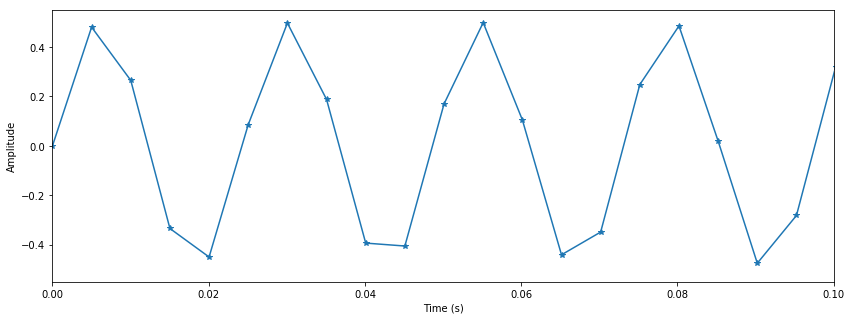

In [67]:
sample_rate = 200 # sample pr. second
duration = 2.0    # seconds
amplitude = 0.5
frequency = 440
n_samples = int(duration * sample_rate)
time = linspace(0, duration, n_samples) # time variable
sound_440 = amplitude * sin(2 * pi * frequency * time)        # pure sine wave at 440 Hz

plot(time, sound_440, '-*')
xlim([0, .1])
xlabel('Time (s)')
ylabel('Amplitude')

(1e-12, 1.0)

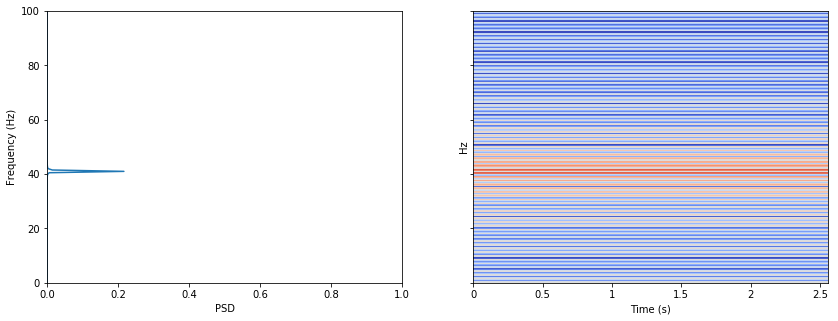

In [68]:
sound_frequency = abs(librosa.stft(sound_440))
sound_frequency_db = librosa.amplitude_to_db(sound_frequency)

fig, (psd_ax, spec_ax) = subplots(1, 2, sharey=True)
librosa.display.specshow(
  sound_frequency_db, sr=sample_rate, x_axis='time', y_axis='hz', ax=spec_ax)
spec_ax.set_ylim([0, 100])
spec_ax.set_xlabel('Time (s)')

frequency, psd = signal.periodogram(sound_440, sample_rate)
psd_ax.plot(psd, frequency)
psd_ax.set_ylabel('Frequency (Hz)')
psd_ax.set_xlabel('PSD')
psd_ax.set_xlim([1e-12, 1e-0])

In [69]:
print('Peak frequency is', frequency[psd == psd.max()], 'Hz')

Peak frequency is [41.] Hz


<!-- --- begin exercise --- -->

## Exercise 7: Discussion

What's happening here? Why does our analysis say that the signal is a sinusoid
at 41 Hz, when we specifically made it to be at 440 Hz? Does mathematics not
work anymore?


**a)**
Imagine that we recorded someone who sang a perfect 440 Hz pitch, but we used
only a sampling rate of 200 Hz, how would this sound like?


<!-- --- begin solution of exercise --- -->
**Solution.**

In [70]:
ipd.Audio(sound_440, rate=sample_rate)

<!-- --- end solution of exercise --- -->

**b)**
Go together in groups of 4-5 and discuss how this relates to the recording of
any signal.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 8: Finding a Good Sampling Frequency

Here we will seek empirically for a `sample_rate` that does not make the signal
apear to be at the wrong frequency.

Use the below code to find a `sample_rate` that gives a sound signal at 440 Hz.
The figure to the left has the peak frequency printed in the legend.

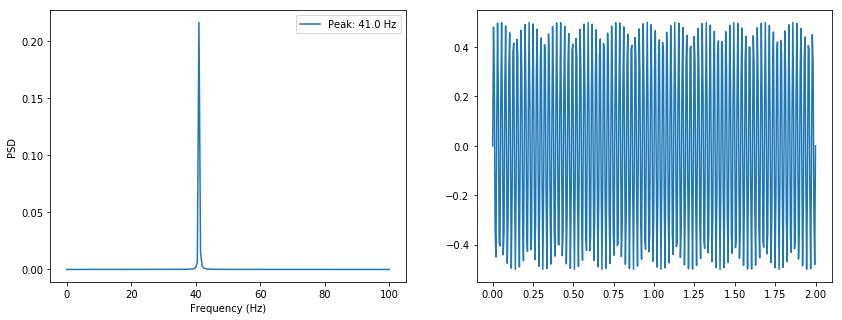

In [71]:
sample_rate = 200 # sample pr. second

duration = 2.0    # seconds
amplitude = 0.5
frequency = 440
n_samples = int(duration * sample_rate)
time = linspace(0, duration, n_samples) # time variable
sound_440 = amplitude * sin(2 * pi * frequency * time) # pure sine wave at 440 Hz
frequency, psd = signal.periodogram(sound_440, sample_rate)

fig, (psd_ax, amp_ax) = subplots(1, 2)

amp_ax.plot(time, sound_440)
peak_freq = frequency[psd == psd.max()]
psd_ax.plot(frequency, psd, label='Peak: {} Hz'.format(float(peak_freq)))
psd_ax.set_xlabel('Frequency (Hz)')
psd_ax.set_ylabel('PSD')
psd_ax.legend()

<!-- --- begin solution of exercise --- -->
**Solution.**

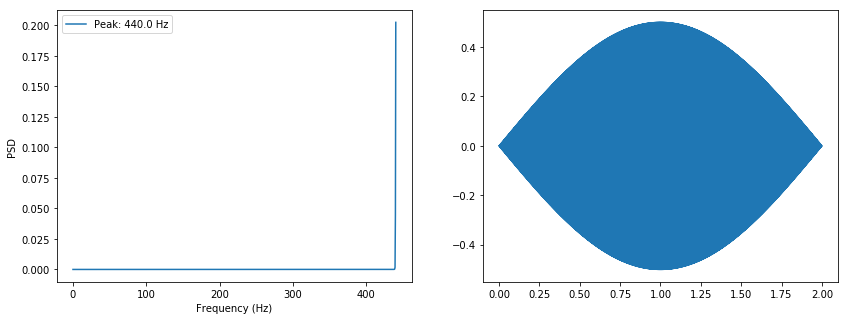

In [72]:
sample_rate = 880 # sample pr. second

duration = 2.0    # seconds
amplitude = 0.5
frequency = 440
n_samples = int(duration * sample_rate)
time = linspace(0, duration, n_samples) # time variable
sound_440 = amplitude * sin(2 * pi * frequency * time) # pure sine wave at 440 Hz
frequency, psd = signal.periodogram(sound_440, sample_rate)

fig, (psd_ax, amp_ax) = subplots(1, 2)

amp_ax.plot(time, sound_440)
peak_freq = frequency[psd == psd.max()]
psd_ax.plot(frequency, psd, label='Peak: {} Hz'.format(float(peak_freq)))
psd_ax.set_xlabel('Frequency (Hz)')
psd_ax.set_ylabel('PSD')
psd_ax.legend()

The sampling rate should be the double of the frequency of the signal, i.e.
880 Hz

<!-- --- end solution of exercise --- -->

<!-- Closing remarks for this Exercise -->

### Remarks

When the sampling rate is at it's minimum in order to retain the correct
frequency of the signal the signal still looks distorted when plotted in time.
However, there is no loss of information, which can be seen from the periodogram.
How strange is this? The signal looks completely messed up, but it's actually not.

This is because we know it is a sinusoid, therefore we may use that information
when interpolating between the lines. That is, we don't just draw lines between
the points, we draw a sinusoid. And as we will discuss below, there is only one
sinusoid that fit as long as the frequency is lower than $1/2$ of the sampling
rate.


<!-- --- end exercise --- -->


## Why this relation between sampling rate and signal frequency
The reasoning goes like this:
1. a signal can be completely described by a series of sinusoids at different
frequencies (Fourier series)
2. when sampling a signal, the sinusoid with the highest frequency gets the fewest samples pr period.
3. if we can reconstruct the sinusoid with the highest frequency, we can
reconstruct the lower frequencies as well.
4. if you have 2 measured points (or more) per period you can reconstruct a
sinusoid (needs proof)

This will give you a sampling frequency that is twice than that of the highest
frequency in the signal you measure.

If we plot ten periods of the "real" 440 Hz signal overlaid with the low
sampling version, we can see that the blue points fit exactly on the orange
line. It can further be shown that in the range [0, 440] Hz, this is the only
line that fits exactly.

(0.22727272727272727, 0.25)

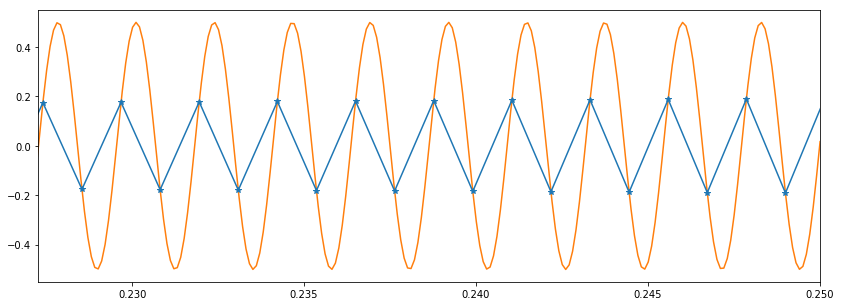

In [73]:
duration = 2.0    # seconds
amplitude = 0.5

frequency_real = 440
sample_rate_real = 10000 # sample pr. second
n_samples_real = int(duration * sample_rate_real)
time_real = linspace(0, duration, n_samples_real) # time variable
sound_real = amplitude * sin(2 * pi * frequency_real * time_real) # pure sine wave at 440 Hz


frequency_low = 440
sample_rate_low = 880 # sample pr. second
n_samples_low = int(duration * sample_rate_low)
time_low = linspace(0, duration, n_samples_low) # time variable
sound_low = amplitude * sin(2 * pi * frequency_low * time_low) # pure sine wave at 440 Hz

plot(time_low, sound_low, '-*', zorder=1)
plot(time_real, sound_real, zorder=0)
xlim([100 / frequency_low, 110 / frequency_low])

<!-- --- begin exercise --- -->

## Exercise 9: Practical consquences

You measure the heart rate from a rat, the maximum heart rate you can think of
is 400 beats/min.

What sampling rate would you choose in order to be sure to measure the
correct heart rate?

<!-- --- end exercise --- -->